In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Representação

## Posição

(0.0, 5.0, 0.0, 5.0)

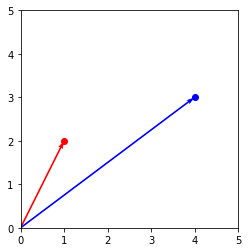

In [9]:
# Definindo pois pontos (vetores)
# Lembrando que os valores representam as componentes
p = np.array([1, 2])
q = np.array([4, 3])

# Origem
origin = np.array([0, 0])

# Plotando os pontos e a representação vetorial
plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.quiver(*origin, *p, color='r', angles='xy', scale_units='xy', scale=1)

plt.plot(q[0], q[1], 'bo')
plt.quiver(*origin, *q, color='b', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

## Direção

[3 1]
3.1622776601683795
0.3217505543966422
[0.9486833  0.31622777]


(0.0, 5.0, 0.0, 5.0)

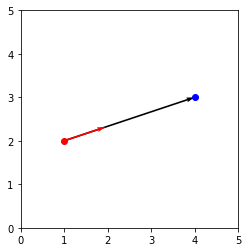

In [19]:
v = q - p
print(v)

# Norma (magnitude)
m = np.linalg.norm(v)
print(m)

# Orientação
a = np.arctan2(v[1], v[0])
print(a)

# Vetor unitário (direção)
u = v / m
print(u)


plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.plot(q[0], q[1], 'bo')

# Plotando o vetor deslocamento
plt.quiver(*p, *v, color='k', angles='xy', scale_units='xy', scale=1)

# Plotando o vetor direção
plt.quiver(*p, *u, color='r', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

## Referencial

(0.0, 5.0, 0.0, 5.0)

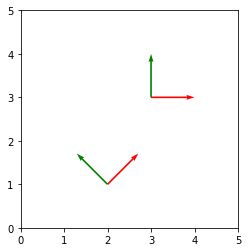

In [28]:
# Matriz de rotação em relação a Z
def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])


# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    
 
plt.figure()

# Frame A
Porg = np.array([2, 1, 0])    
R = Rz(np.deg2rad(45))
plot_frame(Porg, R)

# Frame B
Porg = np.array([3, 3, 0])    
R = Rz(np.deg2rad(0))
plot_frame(Porg, R)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

# Mapeamento

## Translação

In [5]:
pb = np.array([4, 3, 5])

pa_borg = np.array([7, 2, 0])

pa = pb + pa_borg
print(pa)

[11  5  5]


## Rotação

In [6]:
pb = np.array([0, 2, 0])

theta = np.deg2rad(30)

# Qual operador de multiplicação utilizar?
# https://blog.finxter.com/numpy-matmul-operator/

pa = Rz(theta).dot(pb)
print(pa)

pa = np.matmul(Rz(theta), pb)
print(pa)

pa = Rz(theta) @ pb
print(pa)

[-1.          1.73205081  0.        ]
[-1.          1.73205081  0.        ]
[-1.          1.73205081  0.        ]


## Euler angles

In [26]:
def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


alpha = np.pi/2
beta = np.pi/4
gamma = np.pi/3

R = Rz(alpha) @ Ry(beta) @ Rx(gamma)
print(R)

cB = np.sqrt(R[0,0]**2 + R[1,0]**2)

# Obtendo os Euler Angles a partir da matriz
beta_calc = np.arctan2(-R[2,0], cB)
alpha_calc = np.arctan2(R[1,0]/cB, R[0,0]/cB)
gamma_calc = np.arctan2(R[2,1]/cB, R[2,2]/cB)

print(alpha, alpha_calc)
print(beta, beta_calc)
print(gamma, gamma_calc)

[[ 4.32978028e-17 -5.00000000e-01  8.66025404e-01]
 [ 7.07106781e-01  6.12372436e-01  3.53553391e-01]
 [-7.07106781e-01  6.12372436e-01  3.53553391e-01]]
1.5707963267948966 1.5707963267948966
0.7853981633974483 0.7853981633974483
1.0471975511965976 1.0471975511965976


## Translação + Rotação

In [8]:
pb = np.array([3, 7, 0])

pa_borg = np.array([10, 5, 0])

theta = np.deg2rad(30)
pa = Rz(theta) @ pb + pa_borg
print(pa)

[ 9.09807621 12.56217783  0.        ]


# Para praticar

- Faça diferentes testes alterando os valores dos pontos, translação e rotação
- Nos exempplos, plote os pontos e seus respectivos sistemas de coordenadas
- Plote a representação vetorial dos pontos resultantes dos exemplos (igual aos slides)